In [16]:
import pandas as pd

In [17]:
from sklearn.datasets import load_diabetes

In [18]:
diabetes=load_diabetes()

In [19]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [20]:
import pandas as pd
df_daibetes=pd.DataFrame(diabetes.data,columns=
                         ['age',
                          'sex','bmi',
                          'bp','s1',
                          's2','s3',
                          's4','s5',
                          's6'])

In [21]:
df_daibetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [22]:
X=df_daibetes
y=diabetes['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=34)

In [26]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
379,-0.001882,-0.044642,-0.038540,0.021872,-0.108893,-0.115613,0.022869,-0.076395,-0.046883,0.023775
305,-0.009147,0.050680,-0.039618,-0.040099,-0.008449,0.016222,-0.065491,0.071210,0.017765,-0.067351
378,0.016281,0.050680,0.002417,-0.005670,-0.005697,0.010899,-0.050764,0.034309,0.022688,-0.038357
153,0.041708,0.050680,-0.043929,0.063187,-0.004321,0.016222,-0.013948,-0.002592,-0.034522,0.011349
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483


In [29]:
corr=X_train.corr()

<Axes: >

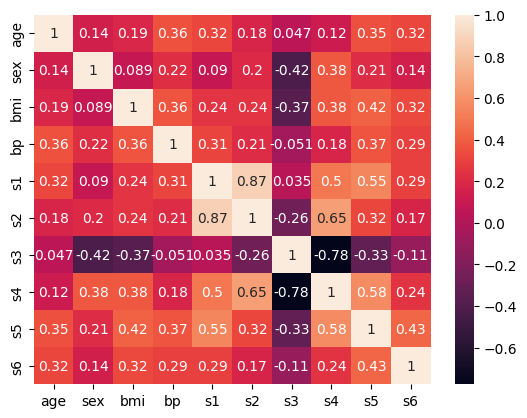

In [31]:
import seaborn as sns

sns.heatmap(corr,annot=True)

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
##Hyperparameter tuning 

param = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}



In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
regressor = DecisionTreeRegressor()

In [37]:
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [38]:
grid.fit(X_train,y_train)

d:\berlin\udemy\projects\lambda\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "d:\berlin\udemy\projects\lambda\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\berlin\udemy\projects\lambda\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\berlin\udemy\projects\lambda\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [39]:
y_pred=grid.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(score)

4393.561290322581
52.85806451612903
66.28394443847304
0.24348356544184524


In [44]:
select_model=DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='log2', splitter='random')

In [45]:
select_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5288461538461539, 0.9, 'x[8] <= 0.053\nabsolute_error = 67.106\nsamples = 132\nvalue = 169.0'),
 Text(0.3076923076923077, 0.7, 'x[8] <= 0.012\nabsolute_error = 63.889\nsamples = 108\nvalue = 141.5'),
 Text(0.4182692307692308, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'x[0] <= -0.026\nabsolute_error = 57.246\nsamples = 69\nvalue = 102.0'),
 Text(0.07692307692307693, 0.3, 'x[1] <= -0.04\nabsolute_error = 48.1\nsamples = 30\nvalue = 97.0'),
 Text(0.038461538461538464, 0.1, 'absolute_error = 53.455\nsamples = 22\nvalue = 118.0'),
 Text(0.11538461538461539, 0.1, 'absolute_error = 17.625\nsamples = 8\nvalue = 71.0'),
 Text(0.23076923076923078, 0.3, 'x[3] <= 0.126\nabsolute_error = 63.641\nsamples = 39\nvalue = 109.0'),
 Text(0.19230769230769232, 0.1, 'absolute_error = 62.5\nsamples = 38\nvalue = 106.0'),
 Text(0.2692307692307692, 0.1, 'absolute_error = 0.0\nsamples = 1\nvalue = 216.0'),
 Text(0.46153846153846156, 0.5, 'x[3] <= 0.077\nabsolute_error = 53.462\nsamples = 39\nvalue

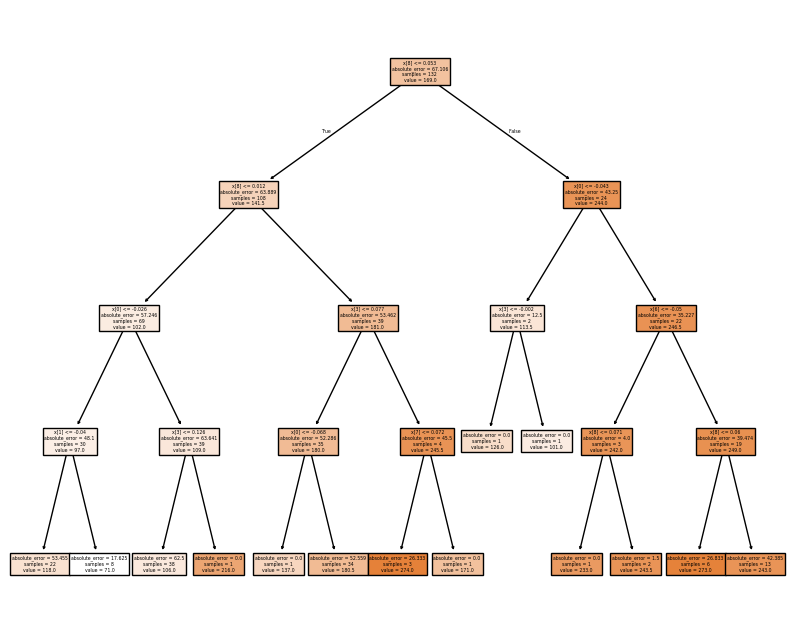

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(select_model,filled=True)